<a href="https://colab.research.google.com/github/IkeLyons/HW5_ImageNets/blob/main/ImageNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am using a dataset of men and women's faces in order to do a classification task (https://www.kaggle.com/maciejgronczynski/biggest-genderface-recognition-dataset).

# Task 1

# Importing the dataset

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download maciejgronczynski/biggest-genderface-recognition-dataset

biggest-genderface-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip -o biggest-genderface-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: faces/woman/woman_5038.jpg  
  inflating: faces/woman/woman_5039.jpg  
  inflating: faces/woman/woman_504.jpg  
  inflating: faces/woman/woman_5040.jpg  
  inflating: faces/woman/woman_5041.jpg  
  inflating: faces/woman/woman_5042.jpg  
  inflating: faces/woman/woman_5043.jpg  
  inflating: faces/woman/woman_5044.jpg  
  inflating: faces/woman/woman_5045.jpg  
  inflating: faces/woman/woman_5046.jpg  
  inflating: faces/woman/woman_5047.jpg  
  inflating: faces/woman/woman_5048.jpg  
  inflating: faces/woman/woman_5049.jpg  
  inflating: faces/woman/woman_505.jpg  
  inflating: faces/woman/woman_5050.jpg  
  inflating: faces/woman/woman_5051.jpg  
  inflating: faces/woman/woman_5052.jpg  
  inflating: faces/woman/woman_5053.jpg  
  inflating: faces/woman/woman_5054.jpg  
  inflating: faces/woman/woman_5055.jpg  
  inflating: faces/woman/woman_5056.jpg  
  inflating: faces/woman/woman_5057.jpg  
  inflating: faces/woman/wo

In [6]:
import os
directory = "./faces"
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['man', 'woman']
2


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

img_height, img_width = 128, 128
batch_size = 32

train_set = tf.keras.preprocessing.image_dataset_from_directory(
  './faces',
  validation_split=0.15,
  subset="training",
  seed=2,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27167 files belonging to 2 classes.
Using 23092 files for training.


In [8]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  './faces',
  validation_split=0.15,
  subset="validation",
  seed=2,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27167 files belonging to 2 classes.
Using 4075 files for validation.


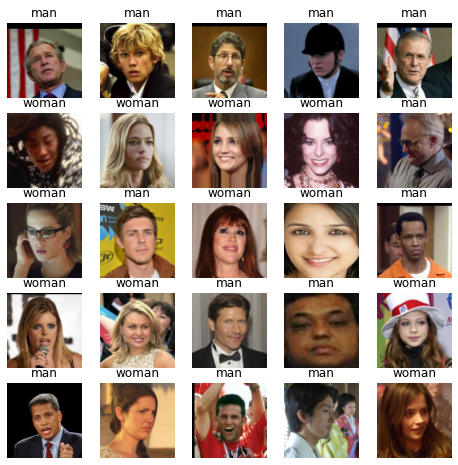

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
  for i in range(1,26):
    ax = plt.subplot(5, 5, i)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_set.class_names[labels[i]])
    plt.axis("off")
    plt.grid(False)

# Creating/training the model

Here I setup my simple model to try to classify faces. I decided to use 3 convolutional layers with MaxPooling layers between them. In those convolutional layers the number of output filters I decided to increase at each convolutional layer. I also decided to go with a window of size (3,3) so that I could attempt to capture some broader features from the faces. After these convolution and pooling layers, I flatten the output and feed it into a dense network with 64 nodes. This number of nodes seemed to allow my model to capture the output information from the convolution well, without overfitting too much. Then I feed the dense net into my two output nodes for classification of either man or woman.

In [84]:
from tensorflow.keras import models

def create_basic_model():
  model = models.Sequential()
  model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(2))
  return model

model = create_basic_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_294 (Conv2D)          (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_295 (Conv2D)          (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_296 (Conv2D)          (None, 28, 28, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)               

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [12]:
history = model.fit(train_set, epochs=10, 
                    validation_data=test_set)

Epoch 1/10
722/722 [==============================] - 64s 47ms/step - loss: 3.8068 - accuracy: 0.7016 - val_loss: 0.4483 - val_accuracy: 0.7914
Epoch 2/10
722/722 [==============================] - 36s 49ms/step - loss: 0.4079 - accuracy: 0.8148 - val_loss: 0.4257 - val_accuracy: 0.8059
Epoch 3/10
722/722 [==============================] - 36s 50ms/step - loss: 0.3128 - accuracy: 0.8636 - val_loss: 0.3866 - val_accuracy: 0.8321
Epoch 4/10
722/722 [==============================] - 36s 50ms/step - loss: 0.2367 - accuracy: 0.9005 - val_loss: 0.5030 - val_accuracy: 0.8344
Epoch 5/10
722/722 [==============================] - 33s 46ms/step - loss: 0.1738 - accuracy: 0.9281 - val_loss: 0.4750 - val_accuracy: 0.8243
Epoch 6/10
722/722 [==============================] - 34s 47ms/step - loss: 0.1563 - accuracy: 0.9346 - val_loss: 0.5392 - val_accuracy: 0.8292
Epoch 7/10
722/722 [==============================] - 35s 49ms/step - loss: 0.1226 - accuracy: 0.9517 - val_loss: 0.5504 - val_accuracy:

Here the main metric that I am using to evaluate my model's performance is the valadation loss and accuracy. We see that the valadation accuracy sits at around 85% which I believe is quite good for a very simple model.

128/128 - 4s - loss: 0.6765 - accuracy: 0.8240
Test loss is: 0.6765480041503906
Test accuracy is: 0.8240490555763245


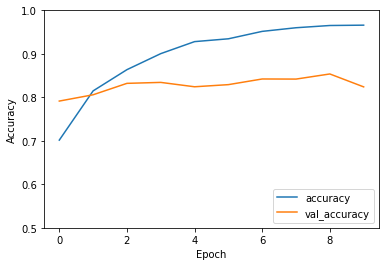

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)
print("Test loss is: " + str(test_loss) + "\nTest accuracy is: " + str(test_acc))

# Using a Pretrained Model

In [86]:
import tensorflow as tf

BATCH_SIZE = 32
IMG_SIZE = (img_height, img_width)

train_set2 = tf.keras.preprocessing.image_dataset_from_directory(
  './faces',
  validation_split=0.15,
  subset="training",
  seed=2,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

val_set2 = tf.keras.preprocessing.image_dataset_from_directory(
  './faces',
  validation_split=0.15,
  subset="validation",
  seed=2,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

AUTOTUNE = tf.data.AUTOTUNE

train_set2 = train_set2.prefetch(buffer_size=AUTOTUNE)
val_set2 = val_set2.prefetch(buffer_size=AUTOTUNE)


Found 27167 files belonging to 2 classes.
Using 23092 files for training.
Found 27167 files belonging to 2 classes.
Using 4075 files for validation.


In [87]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

IMG_SHAPE = IMG_SIZE + (3,)
base_model = InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_297 (Conv2D)             (None, 63, 63, 32)   864         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 63, 63, 32)   96          conv2d_297[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 63, 63, 32)   0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [88]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = layers.Dense(512)(x)
x = layers.Dense(64)(x)
out = layers.Dense(1)(x)
model2 = Model(inputs=inputs, outputs=out)


model2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
tf.math.truediv_7 (TFOpLambd (None, 128, 128, 3)       0         
_________________________________________________________________
tf.math.subtract_7 (TFOpLamb (None, 128, 128, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_8 ( (None, 2048)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               1049

In [89]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history2 = model2.fit(train_set2, epochs=10, 
                    validation_data=val_set2)

Epoch 1/10
 38/722 [>.............................] - ETA: 51s - loss: 5.3150 - accuracy: 0.6554

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_set, verbose=2)
print("Test loss is: " + str(test_loss) + "\nTest accuracy is: " + str(test_acc))

It seems as though the pre-trained model struggled to find much accuracy at this specific classification task. The reason that I think this happened is because InceptionV3 is trained to classify a bunch of different objects, and not find small differences between two of the same object. Both men and women "look" similar to inceptionV3 and thus the model struggles to discriminate between the both of them.

# Using data augmentation

Using built-in layers we can add another layer to our original model that will apply some data augmentation. I did this by creating a new model with exactly the same strucutre as our first model, but just added on a few data augmentation layers.

In [90]:
model3 = models.Sequential()
# Data augmentation layers
model3.add(layers.RandomFlip('horizontal'))
model3.add(layers.RandomFlip('vertical'))
model3.add(layers.RandomRotation(0.2))
# end of data augmentation
model3.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(2))

In [91]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
history3 = model3.fit(train_set, epochs=10, 
                    validation_data=test_set)

Epoch 1/10
722/722 [==============================] - 36s 48ms/step - loss: 1.5824 - accuracy: 0.7046 - val_loss: 0.5319 - val_accuracy: 0.7271
Epoch 2/10
722/722 [==============================] - 35s 49ms/step - loss: 0.4992 - accuracy: 0.7481 - val_loss: 0.4591 - val_accuracy: 0.7860
Epoch 3/10
722/722 [==============================] - 34s 47ms/step - loss: 0.4655 - accuracy: 0.7701 - val_loss: 0.4779 - val_accuracy: 0.7654
Epoch 4/10
722/722 [==============================] - 35s 48ms/step - loss: 0.4468 - accuracy: 0.7851 - val_loss: 0.4538 - val_accuracy: 0.7826
Epoch 5/10
722/722 [==============================] - 34s 47ms/step - loss: 0.4385 - accuracy: 0.7894 - val_loss: 0.4250 - val_accuracy: 0.8027
Epoch 6/10
722/722 [==============================] - 33s 46ms/step - loss: 0.4374 - accuracy: 0.7908 - val_loss: 0.4243 - val_accuracy: 0.7956
Epoch 7/10
722/722 [==============================] - 33s 46ms/step - loss: 0.4258 - accuracy: 0.7993 - val_loss: 0.4180 - val_accuracy:

128/128 - 4s - loss: 0.3969 - accuracy: 0.8113
Test loss is: 0.396877646446228
Test accuracy is: 0.8112883567810059


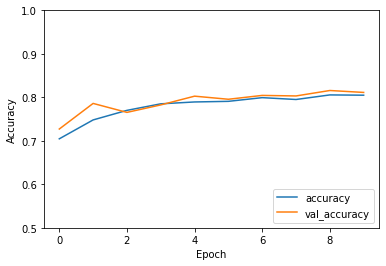

In [46]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(test_set, verbose=2)
print("Test loss is: " + str(test_loss) + "\nTest accuracy is: " + str(test_acc))

The results for this model were much worse than the model without the data augmentation in it. The reason for this I believe is that the model might not have been complex enough to deal with the added difficulty of "seeing" the men/women's faces from many different rotations. The first model might have had a sufficent simplicity to deal with the single orientation of faces. Also, with all of this being said, the test accuracy wasn't too far below the first test, and it could just be down to randomness or training time that the data augmentation model wasn't able to preform better.

# Task 2

In order to test out the variational autoencoder I am going to follow the tutorial given in the homework document (https://www.tensorflow.org/tutorials/generative/cvae) but instead use the fashion mnist dataset (https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [10]:
import tensorflow_datasets as tsdf
import numpy as np
import tensorflow as tf

(train_set, _), (test_set, _) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_set)
test_images = preprocess_images(test_set)

train_ds = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(len(train_images)).batch(32))
test_ds = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(len(test_images)).batch(32))

In [12]:
class CVAE(tf.keras.Model):
  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
                                        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
                                        tf.keras.layers.Conv2D(
                                            filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
                                        tf.keras.layers.Conv2D(
                                            filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(latent_dim + latent_dim),
                                        ])
    self.decoder = tf.keras.Sequential([
                                        tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                                        tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
                                        tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
                                        tf.keras.layers.Conv2DTranspose(
                                            filters=64, kernel_size=3, strides=2, padding='same',
                                            activation='relu'),
                                        tf.keras.layers.Conv2DTranspose(
                                            filters=32, kernel_size=3, strides=2, padding='same', 
                                            activation='relu'),
                                        # No activation
                                        tf.keras.layers.Conv2DTranspose(
                                            filters=1, kernel_size=3, strides=1, padding='same'),
                                        ])
  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def call(self, inputs, *args, **kwargs):
    return self.model(inputs)

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [13]:
optimizer = tf.keras.optimizers.Adam()

def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)

def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def train_step(model, x, optimizer):
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [14]:
model4 = CVAE(2)

In [15]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))
  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [16]:
for test_batch in test_ds.take(1):
  test_sample = test_batch[0:10, :, :, :]

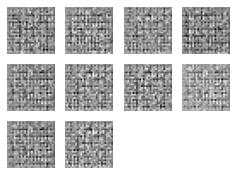

Epoch: 1, Test set ELBO: -199.04541015625


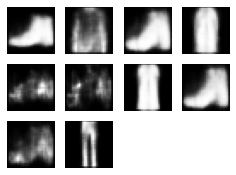

Epoch: 2, Test set ELBO: -191.85536193847656


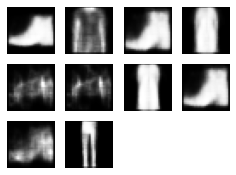

Epoch: 3, Test set ELBO: -190.24337768554688


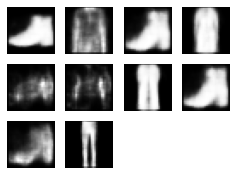

Epoch: 4, Test set ELBO: -188.7683868408203


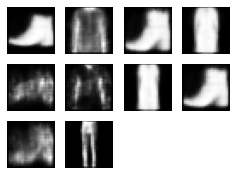

Epoch: 5, Test set ELBO: -186.9488525390625


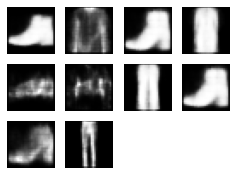

Epoch: 6, Test set ELBO: -185.91006469726562


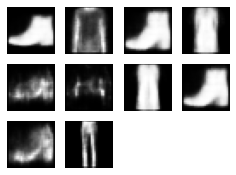

Epoch: 7, Test set ELBO: -185.5431365966797


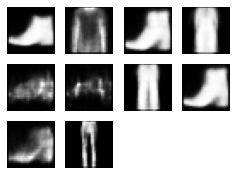

Epoch: 8, Test set ELBO: -184.85804748535156


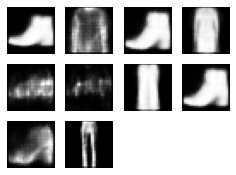

Epoch: 9, Test set ELBO: -184.9911346435547


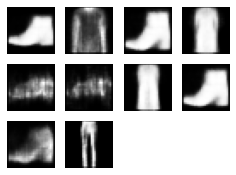

Epoch: 10, Test set ELBO: -184.1693878173828


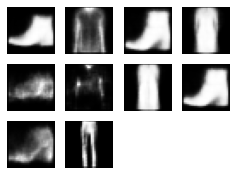

In [17]:
generate_and_save_images(model4, 0, test_sample)

for epoch in range(1, 10 + 1):
  for train_x in train_ds:
    train_step(model4, train_x, optimizer)
  loss = tf.keras.metrics.Mean()
  for test_x in test_ds:
    loss(compute_loss(model4, test_x))
  elbo = -loss.result()
  print('Epoch: {}, Test set ELBO: {}'.format(epoch, elbo))
  generate_and_save_images(model4, epoch, test_sample)

Now I am going to generate images with the same dataset, but using a GAN instead.

In [18]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Reshape((7, 7, 256)))
  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  return model

def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(1))
  return model

In [19]:
generator = make_generator_model()
discriminator = make_discriminator_model()

In [20]:
def discriminator_loss(real_output, fake_output):
  cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

def generator_loss(fake_output):
  cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [21]:
generator_optimizer = tf.keras.optimizers.Adam()
discriminator_optimizer = tf.keras.optimizers.Adam()

In [22]:
@tf.function
def train_step(images):
  noise = tf.random.normal([32, 100])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [26]:
seed = tf.random.normal([16, 100])

def train(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in dataset:
      train_step(image_batch)
    generate_and_save_images(generator, epoch + 1, seed)
    print ("Epoch " + str(epoch + 1) + " completed")
  generate_and_save_images(generator, epochs, seed)

In [24]:
def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

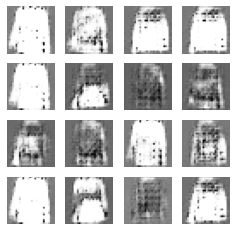

Epoch 0 completed


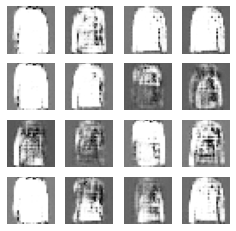

Epoch 1 completed


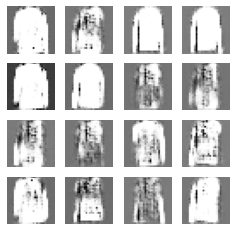

Epoch 2 completed


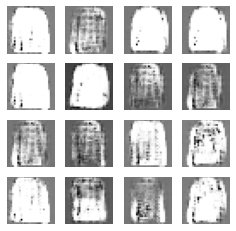

Epoch 3 completed


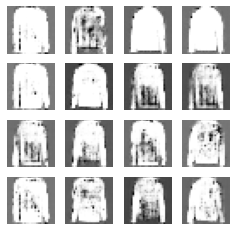

Epoch 4 completed


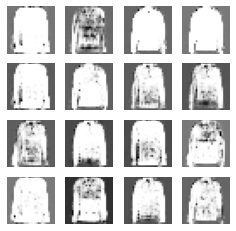

Epoch 5 completed


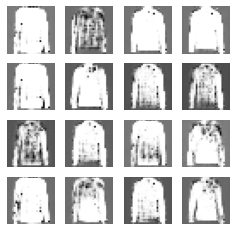

Epoch 6 completed


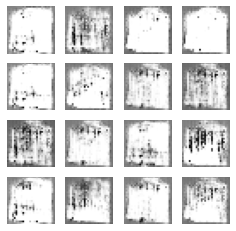

Epoch 7 completed


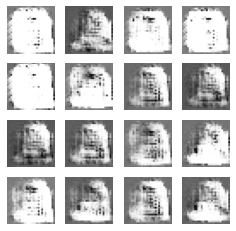

Epoch 8 completed


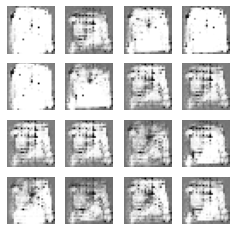

Epoch 9 completed


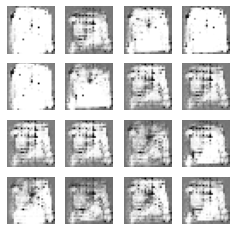

In [27]:
train(train_ds, 10)